In [1]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)

In [2]:
# column name
Columns_Name=['Age','Workclass','Final Weight','Education','Education Number of Years','Marital-status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-loss','Hours-per-week','Native-country','Income']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None) # Load the data
df.columns = Columns_Name   # add column name in dataset
df.head()


,Age,Workclass,Final Weight,Education,Education Number of Years,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df = df.replace({' ':''}, regex=True)

In [4]:
# replace '?' with NaN
df = df.replace({'?': np.nan})

In [5]:
# Selecting numeric columns
num_cols = ['Age', 'Final Weight', 'Education Number of Years', 'Capital-gain', 'Capital-loss', 'Hours-per-week']
# Define the columns to be encoded using LabelEncoder
label_cols = ['Workclass', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-country']
# Define the columns to be encoded using OrdinalEncoder
ordinal_cols = ['Education']
# Define the target column
target_cols = ['Income']

In [6]:
# Define the mapping for ordinal encoding
education_mapping = {
    'Preschool': 0,
    '1st-4th': 0,
    '5th-6th': 1,
    '7th-8th': 1,
    '9th': 2,
    '10th': 2,
    '11th': 2,
    '12th': 2,
    'HS-grad': 3,
    'Some-college': 4,
    'Assoc-voc': 5,
    'Assoc-acdm': 5,
    'Bachelors': 6,
    'Masters': 7,
    'Prof-school': 7,
    'Doctorate': 7
}

In [7]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding and Label Encoding

## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [8]:
# Define the numerical pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('std', StandardScaler())
])


# Define the categorical pipeline
#cat_pipeline = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='most_frequent')),
#    ('encoder', OneHotEncoder(handle_unknown='ignore',sparse_output=False)),
#    ('std', StandardScaler())
#])



# Define the ordinal pipeline
ord_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(categories=[list(education_mapping.keys())])),
    ('std', StandardScaler())
])



# Apply labelencoding for categorical column
df[label_cols] = df[label_cols].apply(lambda x: LabelEncoder().fit_transform(x))
df[label_cols] = StandardScaler().fit_transform(df[label_cols])
df[label_cols]



# Apply label encoding to the 'Income' column
df['Income'] = LabelEncoder().fit_transform(df['Income'])


# Define the preprocessor
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', 'passthrough', label_cols),
    ('ord', ord_pipeline, ordinal_cols),
    ('income', 'passthrough', ['Income'])
    
])


In [9]:
df = pd.DataFrame(preprocessor.fit_transform(df),columns=preprocessor.get_feature_names_out())
df.head()

,num__Age,num__Final Weight,num__Education Number of Years,num__Capital-gain,num__Capital-loss,num__Hours-per-week,cat__Workclass,cat__Marital-status,cat__Occupation,cat__Relationship,cat__Race,cat__Sex,cat__Native-country,ord__Education,income__Income
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,1.658412,0.921634,-1.483582,-0.277805,0.393668,0.703071,0.251378,1.134739,0.0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,1.026306,-0.406212,-0.790510,-0.900181,0.393668,0.703071,0.251378,1.134739,0.0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,-0.237906,-1.734058,-0.328461,-0.277805,0.393668,0.703071,0.251378,-0.420060,0.0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,-0.237906,-0.406212,-0.328461,-0.900181,-1.962621,0.703071,0.251378,-1.197459,0.0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,-0.237906,-0.406212,0.595635,2.211698,-1.962621,-1.422331,-5.337971,1.134739,0.0


In [10]:
print(df['income__Income'].value_counts())

0.0    24720
1.0     7841
Name: income__Income, dtype: int64


#### Data Is Imbalanced

In [11]:
from imblearn.over_sampling import SMOTE 

In [12]:
# Split data dependent and Independent
X = df.drop('income__Income', axis=1)
y= df['income__Income']

In [13]:
# Apply SMOTE to oversample the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [14]:
# Create a new balanced DataFrame
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['target'] = y_resampled

In [15]:
balanced_df['target'].value_counts()

0.0    24720
1.0    24720
Name: target, dtype: int64

### Now Data Is Balanced

In [16]:
## Independent and dependent features
X = balanced_df.drop('target',axis=1)
y = balanced_df['target']

In [17]:
# train_Test_Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=33)

## ML Algorithm

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [19]:
# Define the classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'GradientBoosting Classifier': GradientBoostingClassifier(),
    'XGB Classifier': XGBClassifier()
}

Logistic Regression accuracy: 0.7731256742179072
Logistic Regression AUC-ROC score: 0.8558553023375838



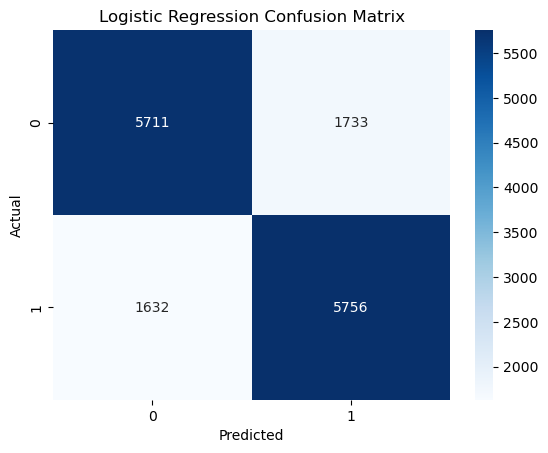

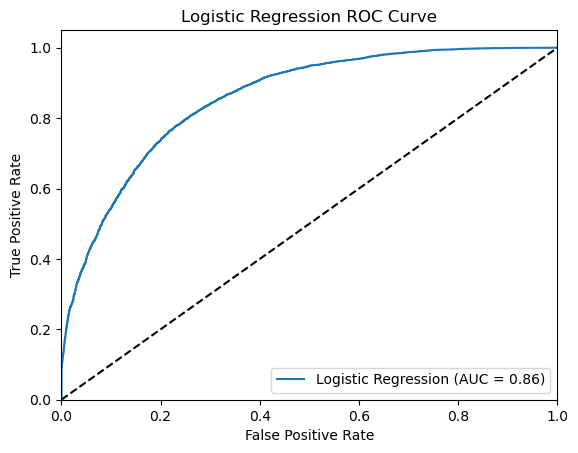

Random Forest accuracy: 0.8990695792880259
Random Forest AUC-ROC score: 0.963775126430388



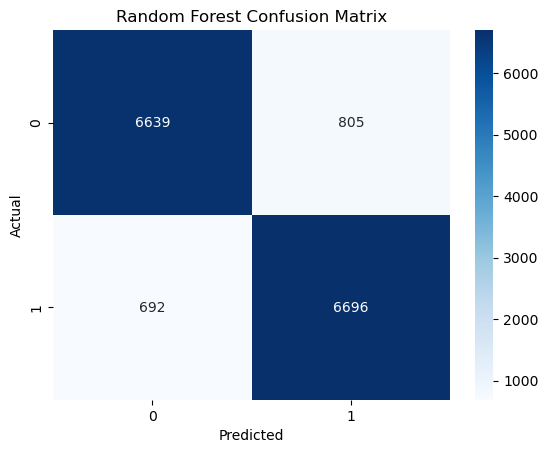

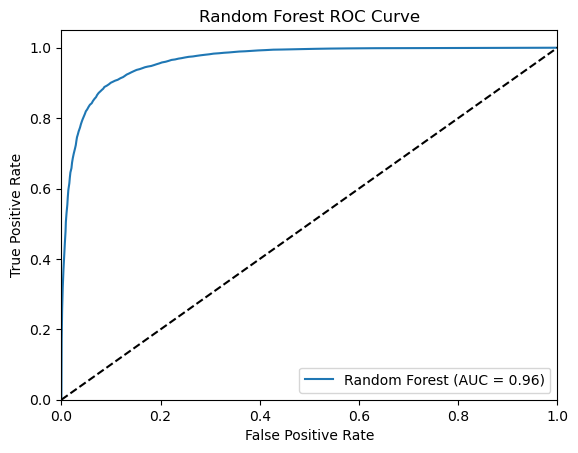

Support Vector Machine accuracy: 0.830029665587918
Support Vector Machine AUC-ROC score: 0.9116470658229343



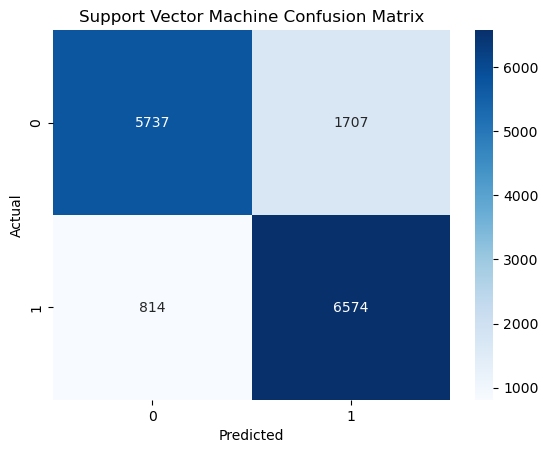

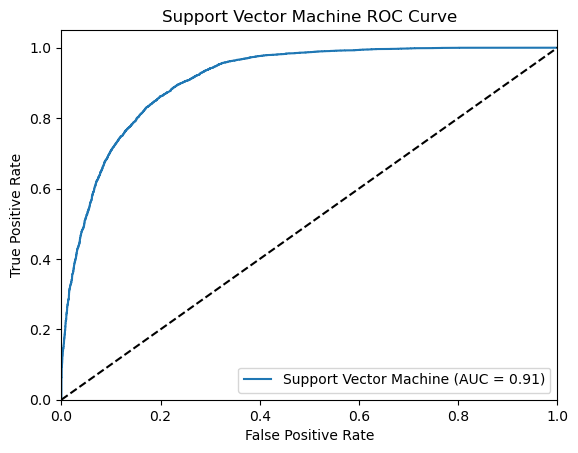

GradientBoosting Classifier accuracy: 0.8673813376483279
GradientBoosting Classifier AUC-ROC score: 0.9474405737901653



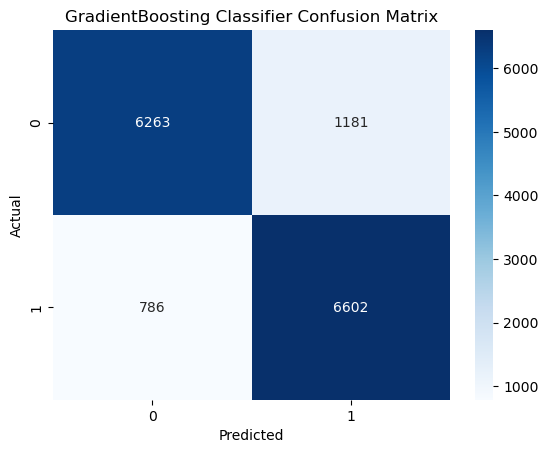

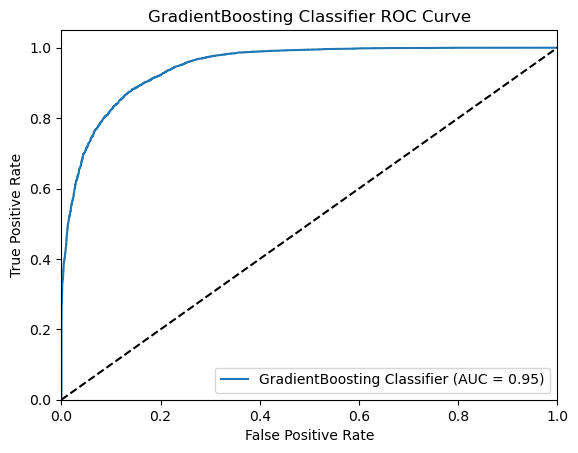

XGB Classifier accuracy: 0.9091154261057174
XGB Classifier AUC-ROC score: 0.9736976899088723



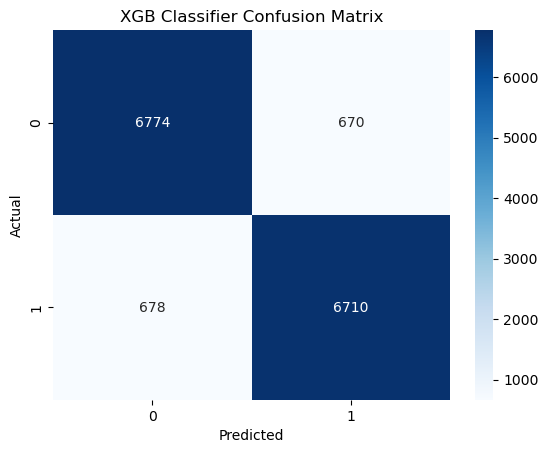

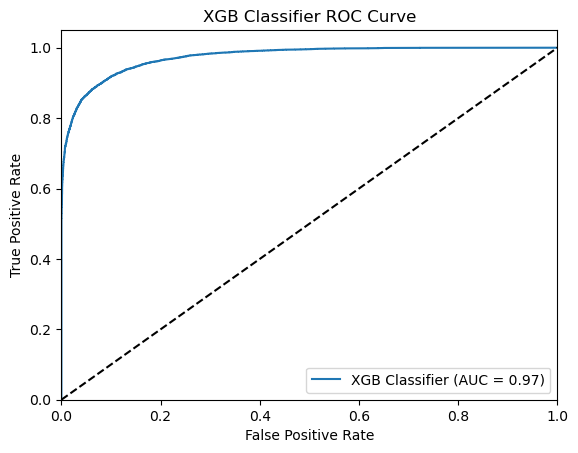

In [20]:
# Train the models and evaluate their performance
accuracy_scores = {}
auc_scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores[model_name] = auc
    
    print(f'{model_name} accuracy: {accuracy}')
    print(f'{model_name} AUC-ROC score: {auc}\n')
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

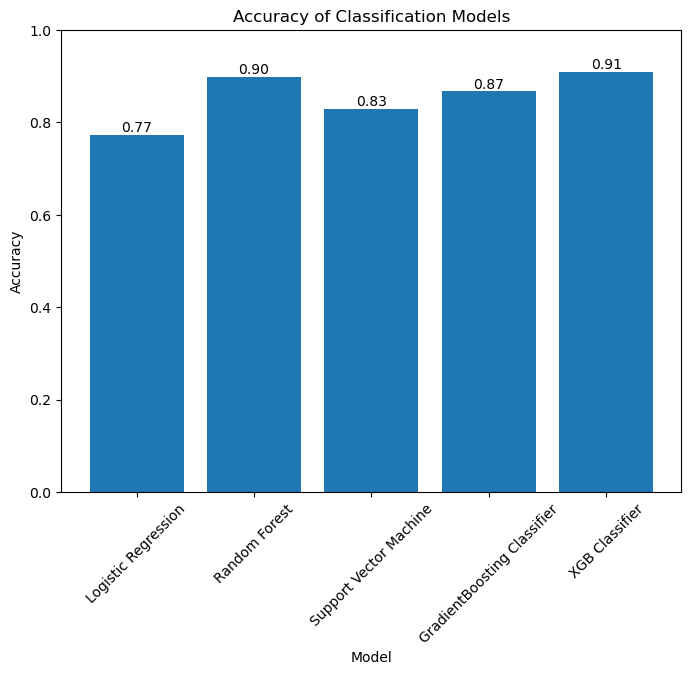

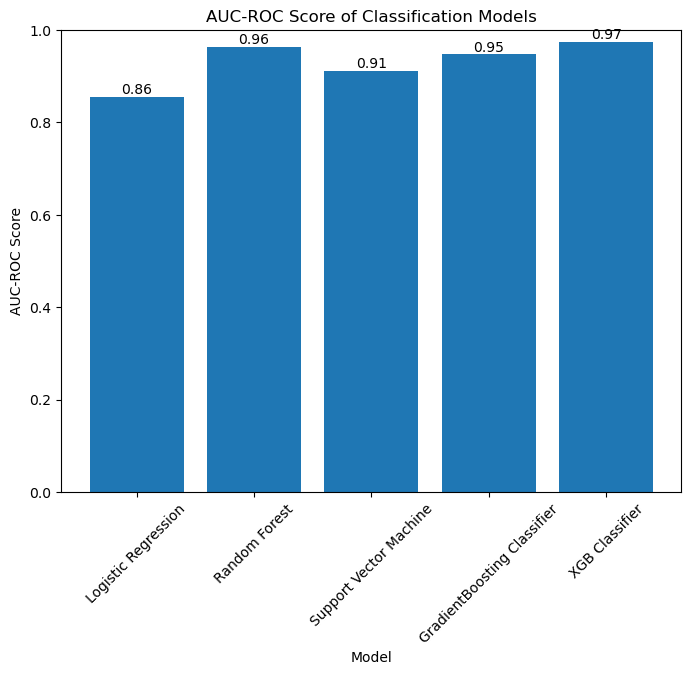

In [21]:
# Plot the accuracy scores
plt.figure(figsize=(8, 6))
bars = plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classification Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

# Plot the AUC-ROC scores
plt.figure(figsize=(8, 6))
bars = plt.bar(auc_scores.keys(), auc_scores.values())
plt.xlabel('Model')
plt.ylabel('AUC-ROC Score')
plt.title('AUC-ROC Score of Classification Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()


# XGB Classifier has more accuracy comparison to other 